Real Coded Genetic Algorithm which minimizes the Rosenbrock function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [2]:
def get_fitness(population):
    size = population.shape[0]
    fitness = np.zeros(size)

    for i in range(size):
        x, y = chromosome_to_real_values(population[i])
        fitness[i] = Rosenbrock(x, y)

    return fitness

In [3]:
def selection(fitness, type):
    if type == 'tournament':
        size = fitness.shape[0]
        selected_indices = np.zeros(size, dtype='int')
        indices = range(size)

        index = 0
        for _ in range(2):
            for parent_1, parent_2 in zip(indices[0::2], indices[1::2]):
                winner = parent_2
                if(fitness[parent_1] < fitness[parent_2]): winner = parent_1
                selected_indices[index] = winner
                index += 1
        
        return selected_indices

In [4]:
def crossover(pool, type):
    if type == 'point':
        size = pool.shape[0]
        new_population = np.zeros(pool.shape, dtype='int')

        for i in range(0, size, 2):
            parent_1, parent_2 = pool[i], pool[i+1]
            idx = np.random.randint(1,size-1)

            new_population[i, 0:idx] = parent_1[0:idx]
            new_population[i, idx:] = parent_2[idx:]
            new_population[i+1, 0:idx] = parent_2[0:idx]
            new_population[i+1, idx:] = parent_1[idx:]
        
        return new_population

In [5]:
def mutate(population, type, p):
    if type == 'per_nuclei':
        temp = np.random.choice([0,1], size=population.shape, p=(1-p,p), replace=True)
        population = population + temp
        population = np.mod(population, 2)
        return population

### Rosenbrock

In [6]:
def Rosenbrock(x, y):
    a, b = 1, 100
    return ( ((a-x)**2) + (b*(y-x**2)**2) )

In [7]:
def real_num(array, func_range):
    dec = np.sum([(2**i)*array[i] for i in range(len(array))])
    real = func_range[0] + ((func_range[1]-func_range[0]) / ((2**len(array))-1)) * dec
    return real

In [8]:
def chromosome_to_real_values(chromosome):
    size = len(chromosome)
    a = chromosome[:size//2]
    b = chromosome[size//2:]
    
    x = real_num(a, func_range)
    y = real_num(b, func_range)
    
    return (x,y)

### Main

In [9]:
func_range = (-1,1)
a, b = 1, 100

population_size = 20
chromosome_size = 10
num_generations = 100

initial_p = 0.2
mutation_p = 0.05

In [10]:
generations = np.zeros((num_generations, population_size, chromosome_size))
fitness_generations = np.zeros((num_generations, population_size))

In [11]:
population = np.random.choice([0,1], size=(population_size, chromosome_size), p=(1-initial_p, initial_p), replace=True)
fitness_population = get_fitness(population)

generations[0,:,:] = population[:,:]
fitness_generations[0,:] = fitness_population[:]

In [12]:
for i in range(1,num_generations):
    selected_individuals = selection(fitness_population, 'tournament')
    crossed_chromosomes = crossover(population[selected_individuals], 'point')
    mutated_chromosomes = mutate(crossed_chromosomes, 'per_nuclei', mutation_p)

    population[:,:] = mutated_chromosomes[:,:]
    fitness_population = get_fitness(population)

    generations[i,:,:] = population[:,:]
    fitness_generations[i,:] = fitness_population[:]

### Analysis

Text(0, 0.5, 'Value of Rosenbrock function')

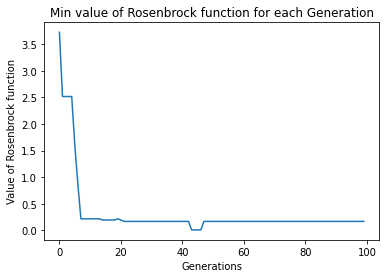

In [13]:
plt.plot(np.min(fitness_generations, axis=1))
plt.title('Min value of Rosenbrock function for each Generation')
plt.xlabel('Generations')
plt.ylabel('Value of Rosenbrock function')

Text(0, 0.5, 'Value of Rosenbrock function')

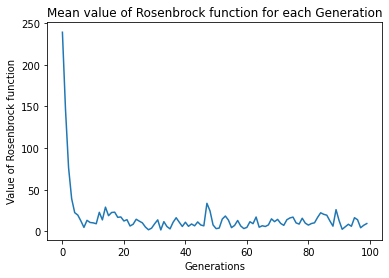

In [14]:
plt.plot(np.mean(fitness_generations, axis=1))
plt.title('Mean value of Rosenbrock function for each Generation')
plt.xlabel('Generations')
plt.ylabel('Value of Rosenbrock function')